In [3]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
%pylab inline

# DATA ------------------------------------------------------------------------
T_values = np.array([222, 284, 308.5, 333, 358, 411, 477, 518, 880, 1080, 1259])
C_values = np.array([0.1282, 0.2308, 0.2650, 0.3120 , 0.3547, 0.4530, 0.5556, 0.6154, 0.8932, 0.9103, 0.9316])

x_samp = T_values
y_samp = C_values   

Populating the interactive namespace from numpy and matplotlib


In [4]:
# GENERAL EQUATION ------------------------------------------------------------
def func(x, A, c, d):
    return A*np.exp(c*x) + d

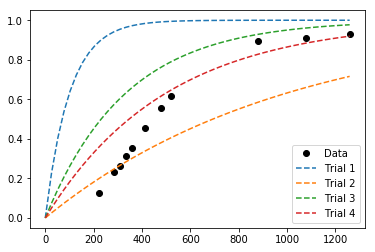

In [5]:
# SURVEY ----------------------------------------------------------------------
# Plotting Sampling Data
plt.plot(x_samp, y_samp, "ko", label="Data")

x_lin = np.linspace(0, x_samp.max(), 50)                   # 50 evenly spaced digits between 0 and max

# Trials
A, c, d = -1, -1e-2, 1
y_trial1 = func(x_lin,  A,     c, d)
y_trial2 = func(x_lin, -1, -1e-3, 1)
y_trial3 = func(x_lin, -1, -3e-3, 1)
y_trial4 = func(x_lin, -1, -2e-3, 1) #Trial agregado 

plt.plot(x_lin, y_trial1, "--", label="Trial 1")
plt.plot(x_lin, y_trial2, "--", label="Trial 2")
plt.plot(x_lin, y_trial3, "--", label="Trial 3")
plt.plot(x_lin, y_trial4, "--", label="Trial 4") #Plot trial agregado 
plt.legend()

Estimated Parameters [-1.66301087 -0.0026884   1.00995394]


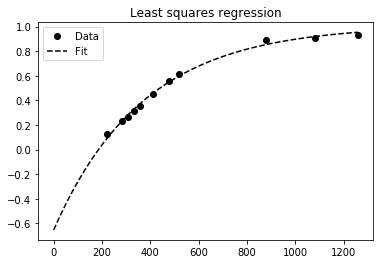

In [6]:
#REGRESSION ------------------------------------------------------------------
p0 = [-1, -3e-3, 1]                                        # guessed params
w, _ = opt.curve_fit(func, x_samp, y_samp, p0=p0)     
print("Estimated Parameters", w)  

# Model
y_model = func(x_lin, *w)

# PLOT ------------------------------------------------------------------------
# Visualize data and fitted curves
plt.plot(x_samp, y_samp, "ko", label="Data")
plt.plot(x_lin, y_model, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")

# Estimated Parameters [-1.66301087 -0.0026884   1.00995394]